# Q5: Pattern Analysis

**Phase 6:** Pattern Analysis & Advanced Visualization  
**Points: 6 points**

**Focus:** Identify trends over time, analyze seasonal patterns, create correlation analysis.

**Lecture Reference:** Lecture 11, Notebook 3 ([`11/demo/03_pattern_analysis_modeling_prep.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/03_pattern_analysis_modeling_prep.ipynb)), Phase 6. Also see Lecture 08 (groupby) and Lecture 07 (visualization).

---

## Setup

In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load feature-engineered data from Q4
df = pd.read_csv('output/q4_features.csv', parse_dates=['Measurement Timestamp'], index_col='Measurement Timestamp')
# Or if you saved without index:
# df = pd.read_csv('output/q4_features.csv')
# df['Measurement Timestamp'] = pd.to_datetime(df['Measurement Timestamp'])
# df = df.set_index('Measurement Timestamp')
print(f"Loaded {len(df):,} records with features")

print(df.head())

Loaded 182,768 records with features
                                      Station Name  Air Temperature  \
Measurement Timestamp                                                 
2015-04-25 09:00:00    63rd Street Weather Station             7.00   
2015-04-30 05:00:00    63rd Street Weather Station             6.10   
2015-05-22 15:00:00     Oak Street Weather Station            13.70   
2015-05-22 16:00:00         Foster Weather Station             9.17   
2015-05-22 17:00:00     Oak Street Weather Station            13.70   

                       Wet Bulb Temperature  Humidity  Rain Intensity  \
Measurement Timestamp                                                   
2015-04-25 09:00:00                     5.9        86             7.2   
2015-04-30 05:00:00                     4.3        76             0.0   
2015-05-22 15:00:00                     7.0        55             0.0   
2015-05-22 16:00:00                    11.6        59             0.0   
2015-05-22 17:00:00        

In [22]:
# Generate output/q5_correlations.csv
df_clean = df.copy()

key_vars = ['Air Temperature', 'Wind Speed', 'Humidity', 'Wet Bulb Temperature', 'Rain Intensity', 'Barometric Pressure', 'Wind Direction'] 
corr_matrix = df_clean[key_vars].corr()
corr_matrix.to_csv('output/q5_correlations.csv')

print(df_clean.head())


                                      Station Name  Air Temperature  \
Measurement Timestamp                                                 
2015-04-25 09:00:00    63rd Street Weather Station             7.00   
2015-04-30 05:00:00    63rd Street Weather Station             6.10   
2015-05-22 15:00:00     Oak Street Weather Station            13.70   
2015-05-22 16:00:00         Foster Weather Station             9.17   
2015-05-22 17:00:00     Oak Street Weather Station            13.70   

                       Wet Bulb Temperature  Humidity  Rain Intensity  \
Measurement Timestamp                                                   
2015-04-25 09:00:00                     5.9        86             7.2   
2015-04-30 05:00:00                     4.3        76             0.0   
2015-05-22 15:00:00                     7.0        55             0.0   
2015-05-22 16:00:00                    11.6        59             0.0   
2015-05-22 17:00:00                     6.3        56           

/var/folders/1t/fdhld8652kzcc785qhfcqrqh0000gn/T/ipykernel_41947/2385847416.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_avg_humidity = df_clean['Humidity'].resample('H').mean()
/var/folders/1t/fdhld8652kzcc785qhfcqrqh0000gn/T/ipykernel_41947/2385847416.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_air_temp = df_clean['Air Temperature'].resample('M').mean()


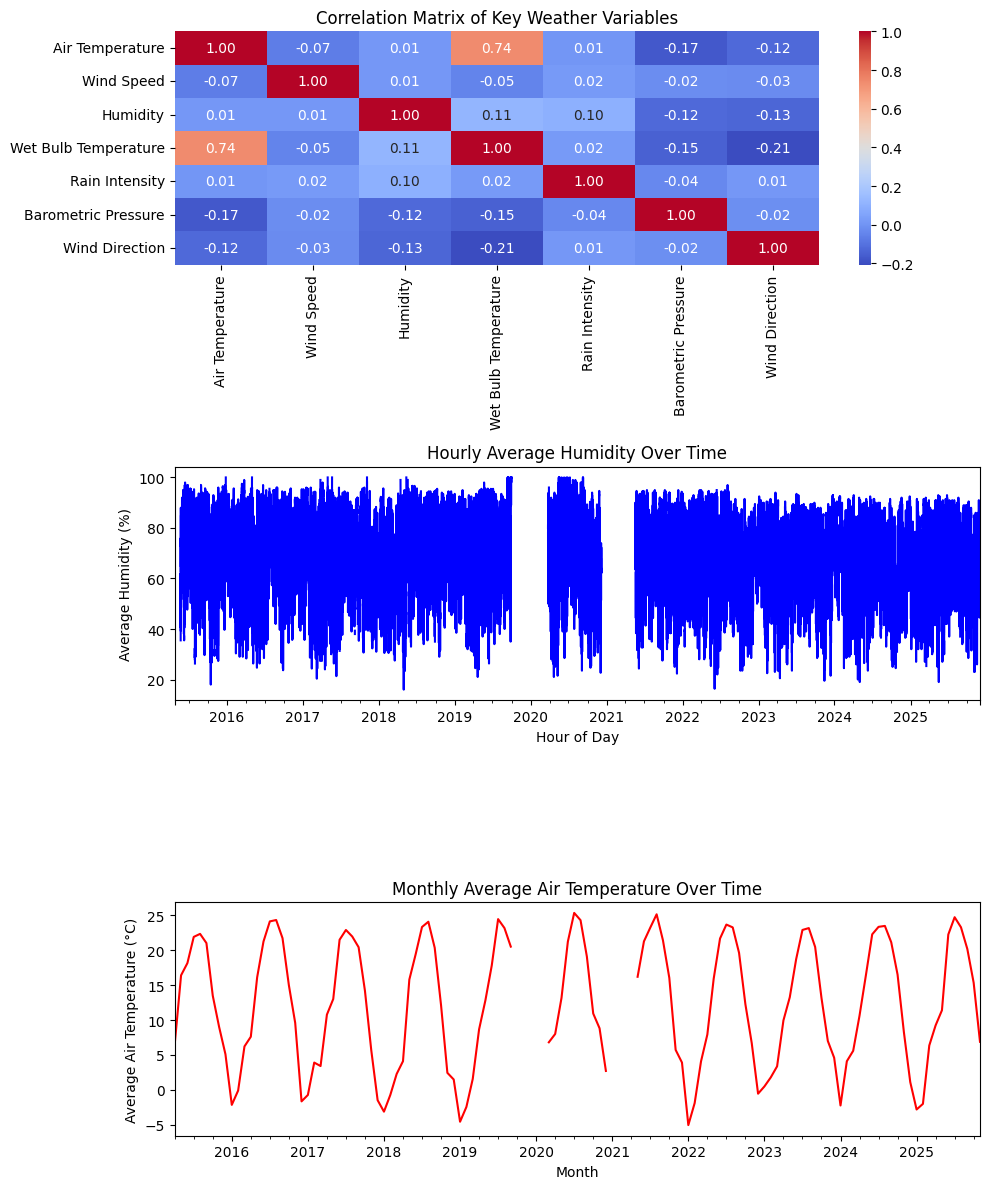

In [24]:
# Generate output/q5_patterns.png
df_clean.reset_index(inplace=True)
df_clean['Measurement Timestamp'] = pd.to_datetime(df_clean['Measurement Timestamp'])
df_clean.set_index('Measurement Timestamp', inplace=True)

fig, axes = plt.subplots(3,1, figsize =(10, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax = axes [0])
axes[0].set_title('Correlation Matrix of Key Weather Variables')

hourly_avg_humidity = df_clean['Humidity'].resample('H').mean()
hourly_avg_humidity.plot(ax=axes[1], color='blue')
axes[1].set_title('Hourly Average Humidity Over Time')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Average Humidity (%)')

monthly_avg_air_temp = df_clean['Air Temperature'].resample('M').mean()
monthly_avg_air_temp.plot(ax=axes[2], color='red')
axes[2].set_title('Monthly Average Air Temperature Over Time')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Average Air Temperature (°C)')
plt.tight_layout()
plt.savefig('output/q5_patterns.png', dpi = 150)
plt.show()



In [ ]:
# Generate output/q5_trend_summary.txt
summary_text = """KEY PATTERNS IDENTIFIED
=======================

TEMPORAL TRENDS:
- Air temperature 

---

## Objective

Identify trends over time, analyze seasonal patterns, and create correlation analysis.

**Time Series Note:** Time series data has temporal patterns (trends, seasonality, cycles). Use time-based aggregations and visualizations to identify these patterns. See **Lecture 09** for time series decomposition and pattern analysis. Use pandas `resample()` to aggregate by time periods (e.g., `resample('ME')` for monthly, `resample('D')` for daily) and `groupby()` with temporal features (hour, day_of_week, month) to identify patterns.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q5_correlations.csv`
**Format:** CSV file
**Content:** Correlation matrix (can be subset of key variables)
**Requirements:**
- Square matrix with variable names as both index and columns
- Values are correlation coefficients (between -1 and 1)
- Can be subset of key variables (e.g., top 10 most important variables)
- **Include index/column names** when saving: `corr_matrix.to_csv('output/q5_correlations.csv')`

**Example format:**
```csv
,Air Temperature,Water Temperature,Wind Speed,Humidity
Air Temperature,1.0,0.847,-0.234,-0.156
Water Temperature,0.847,1.0,0.123,0.089
Wind Speed,-0.234,0.123,1.0,0.456
Humidity,-0.156,0.089,0.456,1.0
```

### 2. `output/q5_patterns.png`
**Format:** PNG image file
**Content:** Advanced visualizations showing trends/seasonality
**Required visualizations (at least 2 of these):**
1. **Trend over time:** Line plot showing variable(s) over time (e.g., monthly averages)
2. **Seasonal pattern:** Bar plot or line plot showing patterns by month, day of week, or hour
3. **Correlation heatmap:** Heatmap of correlation matrix
4. **Multi-panel plot:** Multiple subplots showing different patterns

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

### 3. `output/q5_trend_summary.txt`
**Format:** Plain text file
**Content:** Brief text summary of key patterns identified
**Required information:**
- Temporal trends (increasing, decreasing, stable)
- Seasonal patterns (daily, weekly, monthly cycles)
- Key correlations (mention 2-3 strongest correlations)

**Example format:**
```
KEY PATTERNS IDENTIFIED
======================

TEMPORAL TRENDS:
- Air and water temperatures show clear seasonal patterns
- Higher temperatures in summer months (June-August)
- Lower temperatures in winter months (December-February)
- Monthly air temp range: 4.2°C to 25.8°C

DAILY PATTERNS:
- Temperature shows diurnal cycle (warmer during day, cooler at night)
- Peak air temp typically at hour 14-15 (2-3 PM)
- Minimum air temp typically at hour 5-6 (5-6 AM)

CORRELATIONS:
- Air Temp vs Water Temp: 0.847 (strong positive correlation)
- Air Temp vs Humidity: -0.234 (moderate negative correlation)
- Wind Speed vs Wave Height: 0.612 (moderate positive correlation)
```

---

## Requirements Checklist

- [ ] Trends over time identified (increasing, decreasing, stable)
- [ ] Seasonal patterns analyzed (daily, weekly, monthly cycles)
- [ ] Correlation analysis completed
- [ ] Advanced visualizations created (multi-panel plots, grouped visualizations)
- [ ] Key patterns documented
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Identify trends** - Use `.resample()` to aggregate by time period and visualize long-term patterns
2. **Analyze seasonal patterns** - Use `.groupby()` with temporal features (hour, day_of_week, month)
3. **Create correlation analysis** - Compute correlation matrix for numeric columns
4. **Create visualizations** - Multi-panel plot showing trends, seasonal patterns, and correlations
5. **Document patterns** - Summarize key findings in text file

---

## Decision Points

- **Trend identification:** Is there a long-term trend? Is it increasing, decreasing, or stable? Use time series plots to visualize.
- **Seasonal patterns:** Are there daily patterns? Weekly? Monthly? Use aggregations and visualizations to identify.
- **Correlation analysis:** Which variables are correlated? Use correlation matrix and heatmaps. Focus on relationships that might be useful for modeling.

---

## Checkpoint

After Q5, you should have:
- [ ] Trends identified
- [ ] Seasonal patterns analyzed
- [ ] Correlations calculated
- [ ] Pattern visualizations created
- [ ] All 3 artifacts saved: `q5_correlations.csv`, `q5_patterns.png`, `q5_trend_summary.txt`

---

**Next:** Continue to `q6_modeling_preparation.md` for Modeling Preparation.
